<a href="https://colab.research.google.com/github/ByeonJuHwan/PythonStudy/blob/main/ml04_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [42]:
# 필요한 모듈, 클래스 ,함수 이름들을 import
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures  # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline  # 변환기와 예측기를 연결해주는 클래스
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression  # 선형 회귀를 사용한 숫자 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 회귀 평가 지표들

# 데이터 셋 준비

In [7]:
iris = datasets.load_iris() #> Bunch 클래스 타입 - Python의 dict와 비슷. 

In [8]:
type(iris)

sklearn.utils.Bunch

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
X = iris['data'] # 특성 배열 (2d -array)
y = iris['target'] # 타겟 배열(1d-array)

In [17]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
y[:5]

array([0, 0, 0, 0, 0])

In [20]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
X.shape,y.shape

((150, 4), (150,))

# 데이터셋(X, y)을  Train/Test split

In [29]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.3,
                                          random_state=105)

In [30]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((105, 4), (45, 4), (105,), (45,))

# StabdardScaler - 특성 스케일 변환

In [31]:
std_scaler = StandardScaler()

In [44]:
X_tr_scaled = std_scaler.fit_transform(X_tr)

In [39]:
print(std_scaler.mean_)
print(std_scaler.var_)

[5.78095238 3.06190476 3.64095238 1.13619048]
[0.63944671 0.19150113 3.09251338 0.55964263]


# KNN 모델 생성, 훈련, 평가

* confusion_matrix
* classification_report

In [43]:
knn_clf = KNeighborsClassifier()

In [45]:
knn_clf.fit(X_tr_scaled,y_tr)

KNeighborsClassifier()

In [46]:
knn_clf.score(X_tr_scaled, y_tr) # 정확도

0.9428571428571428

In [48]:
X_te_scaled = std_scaler.transform(X_te) # 정확도
knn_clf.score(X_te_scaled,y_te)

0.9777777777777777

In [49]:
# confusion_matrix
y_tr_pred = knn_clf.predict(X_tr_scaled)
confusion_matrix(y_tr,y_tr_pred)

array([[38,  0,  0],
       [ 0, 32,  2],
       [ 0,  4, 29]])

In [50]:
# classification_report
clf_report = classification_report(y_tr,y_tr_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.89      0.94      0.91        34
           2       0.94      0.88      0.91        33

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



# k값 변화에 따른 정확도 변화

In [55]:
accuracies = []
k_values = np.arange(1,106)
for x in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=x)
    knn_clf.fit(X_tr_scaled,y_tr)
    percent = knn_clf.score(X_tr_scaled,y_tr) # 정확도 
    accuracies.append(percent)

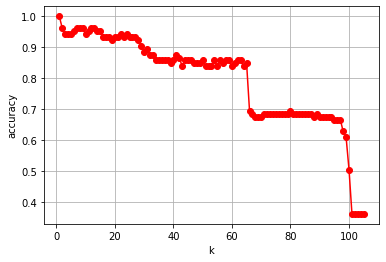

In [56]:
plt.plot(k_values,accuracies,'ro-')
plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()